## CESM2 - LARGE ENSEMBLE (LENS2)

#### by Mauricio Rocha and Dr. Gustavo Marques

- This notebook servers as an example on how to extract ascii data and transform them in NetCDF data. We will use as an example the AMOC data at 34.5S obtained directly from: https://www.aoml.noaa.gov/phod/SAMOC_international/samoc_data.php

### Load data

In [1]:
clear all; close all;  
df = load('/glade/scratch/mauricio/SAMOC/Data/MOC_TotalAnomaly_and_constituents.asc','-ascii');

### Some notes:
###### Column 1: Year
###### Column 2: Month
###### Column 3: Day
###### Column 4: Hour
###### Column 5: Total MOC anomaly (relative to record-length average of 14.7 Sv)
###### Column 6: Relative (density gradient) contribution to the MOC anomaly
###### Column 7: Reference (bottom pressure gradient) contribution to the MOC anomaly
###### Column 8: Ekman (wind) contribution to the MOC anomaly
###### Column 9: Western density contribution to the MOC anomaly
###### Column 10: Eastern density contribution to the MOC anomaly
###### Column 11: Western bottom pressure contribution to the MOC anomaly
###### Column 12: Eastern bottom pressure contribution to the MOC anomaly

In [2]:
jd=datenum(df(1,1),df(1,2),df(1,3)):datenum(df(end,1),df(end,2),df(end,3)); % Time serie in Julian time
jd=jd';

In [3]:
moc=df(:,5)+14.7; % Compute the total MOC value (media + anomaly)
clear df

In [4]:
save('/glade/scratch/mauricio/SAMOC/Data/moc_sambar.mat')

## Let's take a look at what this time series looks like 

#### In trend analysis, the series cannot have any lack. So we replace Nan with the average, to get a trend with "long term."  

Linear trend: -0.16928 Sv per year
p-value: 0.0014003
Is it significant within 95%? Yes


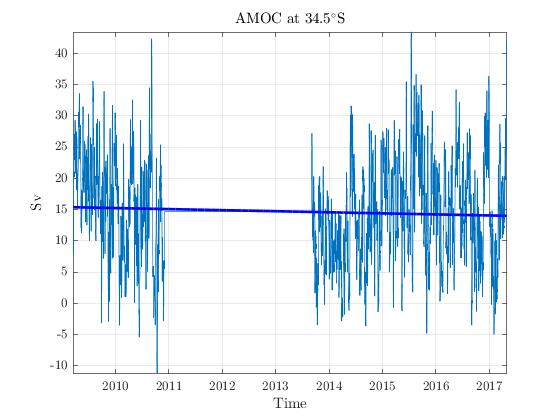

In [5]:
B=fillmissing(moc,'constant',[14.7]);%replace NaN with nearest non-NaN value
x=[1:length(jd)]';
pl=polyfit(x,B,1);
plot(jd,B,'-')
hold on
plot(jd,polyval(pl,x),'b-','LineWidth',2);
grid on
ylabel('Sv','Interpreter','Latex')
xlabel('Time','Interpreter','Latex')
title('AMOC at 34.5$^\circ$S','Interpreter','Latex')
xlim([jd(1) jd(end)])
ylim([min(moc) max(moc)])
datetick('x','yyyy','keeplimits')
set(gca,'TickLabelInterpreter','latex')
str=['Linear trend: ',num2str(pl(1).*365),' Sv per year']; disp(str); clear str
s = regstats(B,x,'linear');
pval = s.tstat.pval(2);
str=['p-value: ',num2str(pval),'']; disp(str); clear str
sig=({'Yes','No'});
if pval<0.05;str=['Is it significant within 95%? ',sig{1},'']; disp(str); clear str;else;str=['Is it significant whithin 95%? ',sig{2},'']; disp(str); clear str;end
saveas(gcf,'AMOC_Upper_Branch_34_5_SAMOC.png')